# Iris Classification

***

In [7]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [97]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

<br>

## Loading the iris dataset

***

In [133]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [134]:
# Have a look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<br>

## Visualise

***

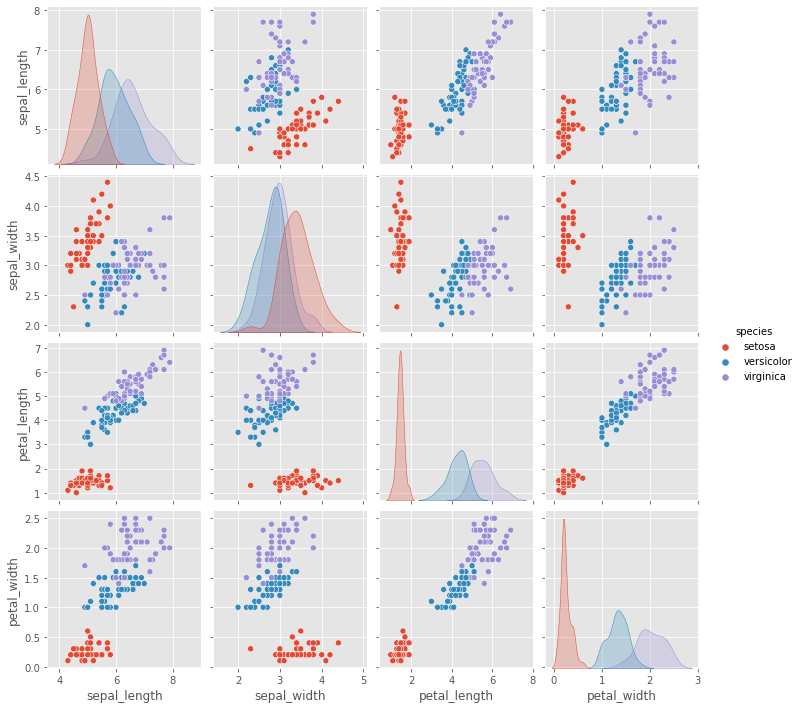

In [17]:
# Scatter plots and kdes.
sns.pairplot(df, hue='species');

<br>

## Two dimensions

***

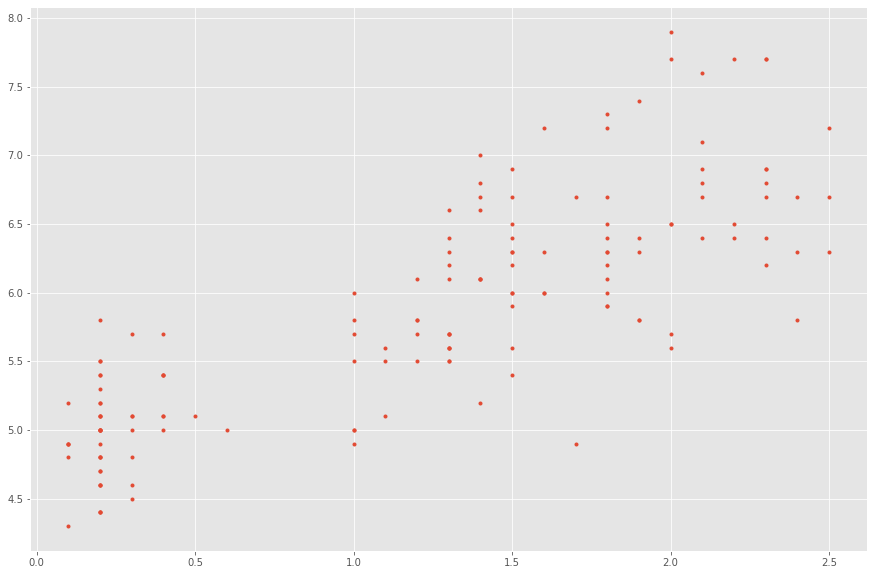

In [98]:
# New figure.
fig, ax = plt.subplots()
# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'], '.');

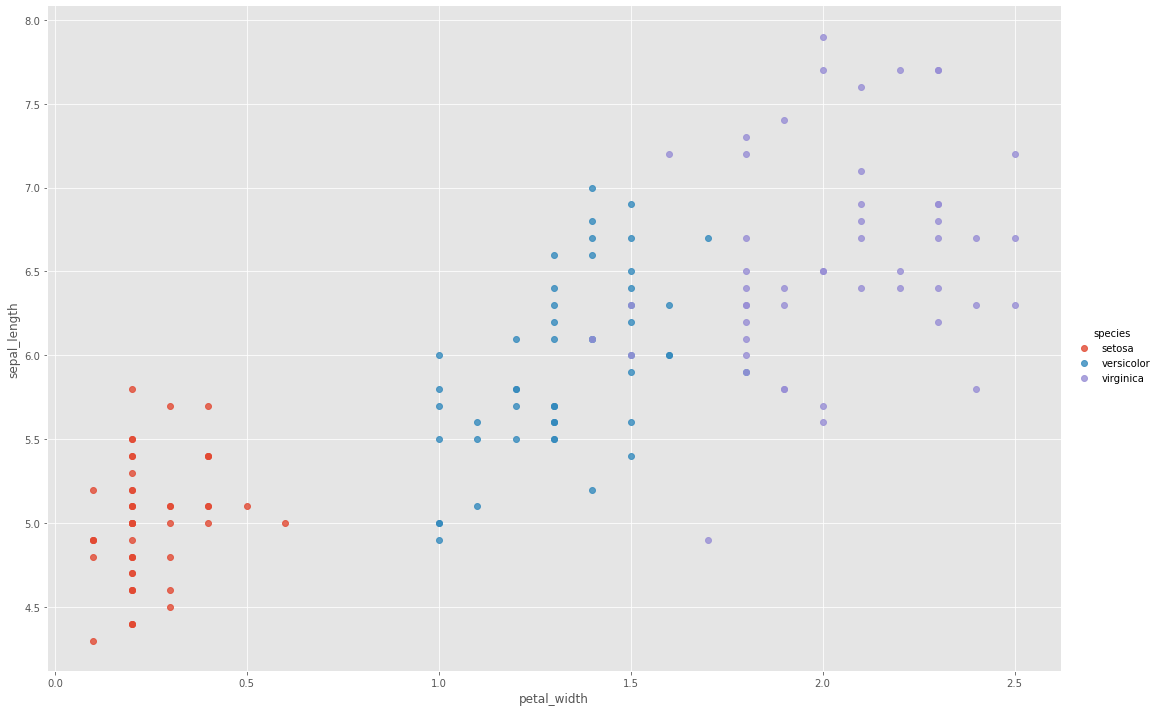

In [96]:
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=False, height=10, aspect=1.5);

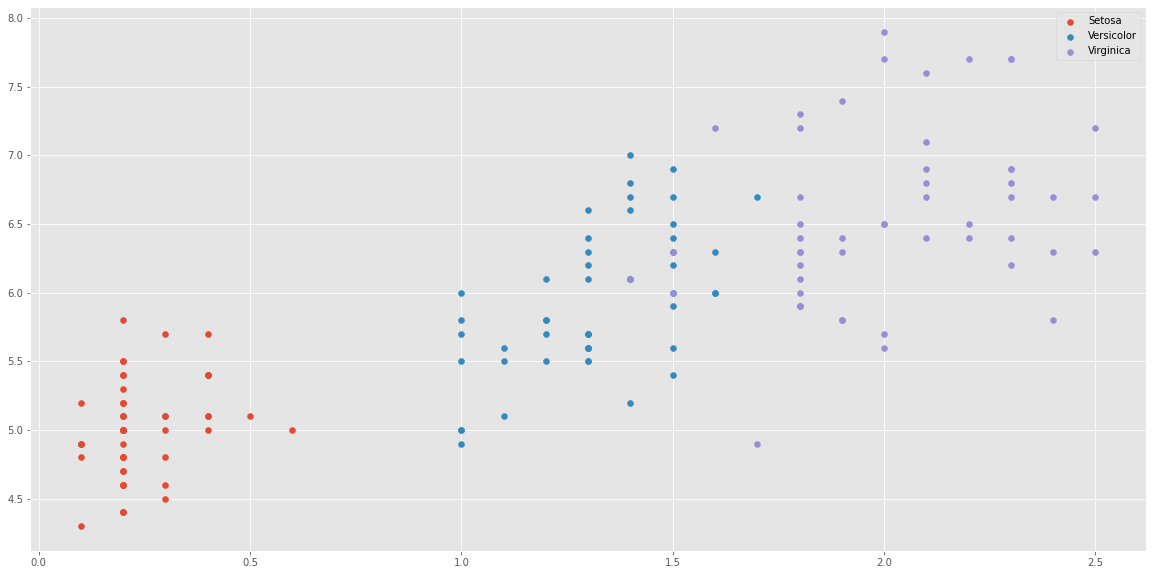

In [79]:
# Segregate the data.
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

# Show the legend.
ax.legend();

In [46]:
# How the segregation works.
df['species'] == 'setosa'

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

<br>

## Test and train split

***

In [60]:
# Split the data frame in two.
train, test = mod.train_test_split(df, test_size=0.33)

In [61]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
22,4.6,3.6,1.0,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
53,5.5,2.3,4.0,1.3,versicolor


In [62]:
# Show some testing data.
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,virginica
102,7.1,3.0,5.9,2.1,virginica
71,6.1,2.8,4.0,1.3,versicolor
119,6.0,2.2,5.0,1.5,virginica
2,4.7,3.2,1.3,0.2,setosa


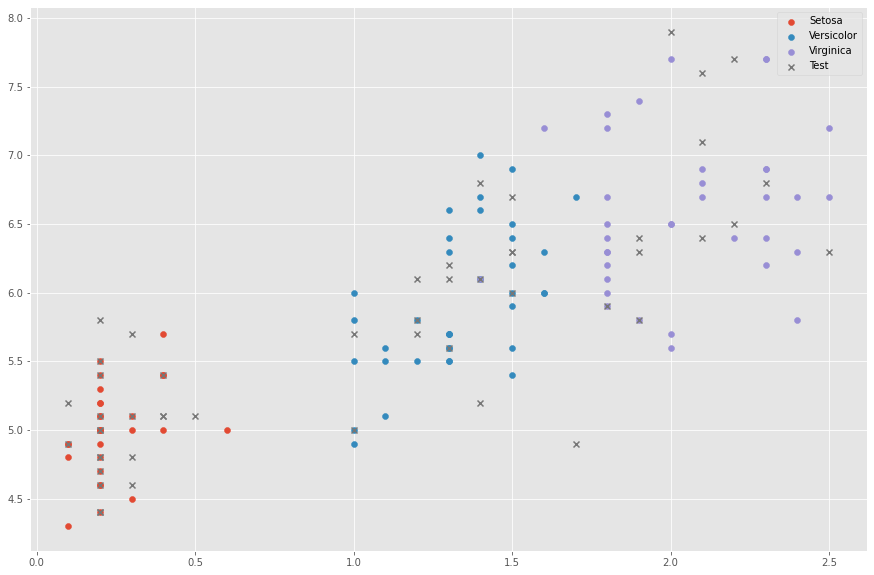

In [99]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test')

# Show the legend.
ax.legend();

<br>

## Inputs and outputs

***

In [90]:
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [91]:
inputs.head()

,sepal_length,sepal_width,petal_length,petal_width
25,5.0,3.0,1.6,0.2
75,6.6,3.0,4.4,1.4
22,4.6,3.6,1.0,0.2
1,4.9,3.0,1.4,0.2
53,5.5,2.3,4.0,1.3


In [92]:
outputs.head()

25        setosa
75    versicolor
22        setosa
1         setosa
53    versicolor
Name: species, dtype: object

<br>

## Logistic regression

***

In [100]:
clf = lm.LogisticRegression(random_state=0).fit(inputs, outputs)

/Users/ian/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
predictions = clf.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor'], dtype=object)

In [118]:
clf.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.92

In [183]:
df.loc[test.index, 'prediction'].shape

(100,)

In [185]:
predictions.shape

(50,)

In [186]:
df['prediction'] = df['species']
df.loc[test.index, 'prediction'] = predictions

In [165]:
df['marker'] = 'Train'
df.loc[test.index, 'marker'] = 'Correct'
df.loc[(test[test['species'] != predictions]).index, 'marker'] = 'Incorrect'

<AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>

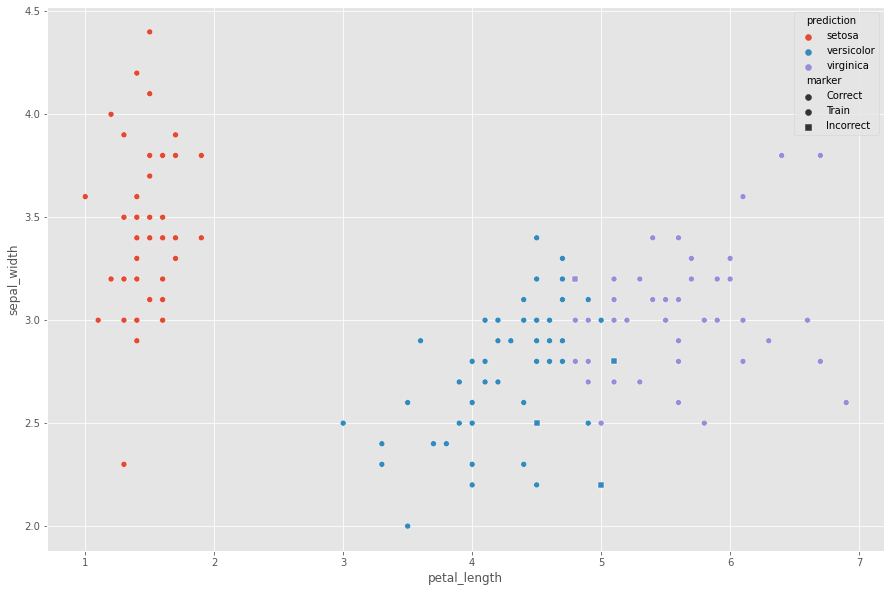

In [187]:
sns.scatterplot(data=df, x='petal_length', y='sepal_width', hue='prediction', style='marker', markers=['o', 'o', 's'])

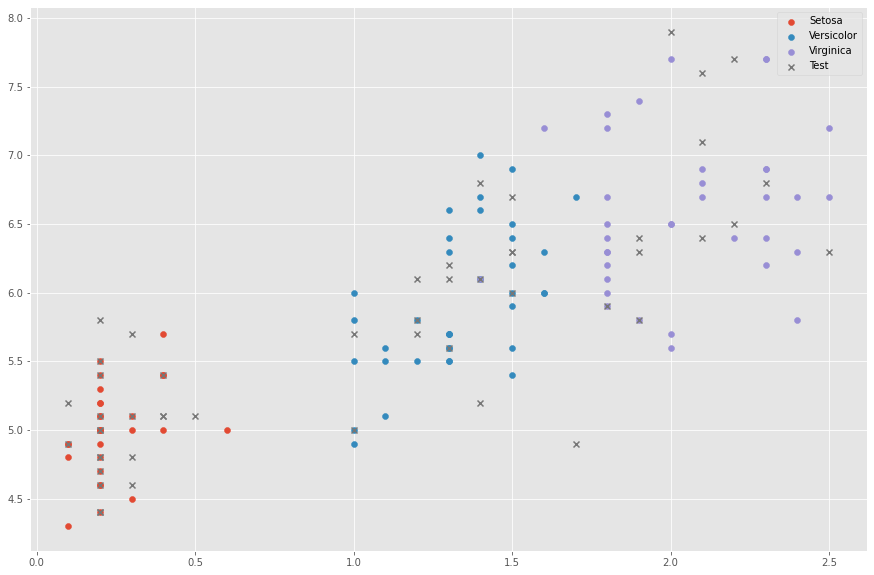

In [175]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Segregate test data based on whether the predaiction was correct.
testy = test[test['species'] == predictions]
testn = test[test['species'] != predictions]


# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test')

# Show the legend.
ax.legend();

In [138]:
testn

,sepal_length,sepal_width,petal_length,petal_width,species,marker
119,6.0,2.2,5.0,1.5,virginica,x
133,6.3,2.8,5.1,1.5,virginica,x
70,5.9,3.2,4.8,1.8,versicolor,x
106,4.9,2.5,4.5,1.7,virginica,x


## Classifier

In [6]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

## Fit

In [7]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predict

In [8]:
df.loc[121]

sepal_length          5.6
sepal_width           2.8
petal_length          4.9
petal_width             2
class           virginica
Name: 121, dtype: object

In [9]:
knn.predict([[5.6, 2.8, 4.9, 2.0]])

array(['virginica'], dtype=object)

## Evaluate

In [10]:
(knn.predict(inputs) == outputs).sum()

145

In [11]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [12]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
(knn.predict(inputs_test) == outputs_test).sum()

48

## End